In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fashion mnist をインポート

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# validation

train_test_split はsklearn.model_selection.train_test_split(X, y, test_size, random_state)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# EDA


# Visualization

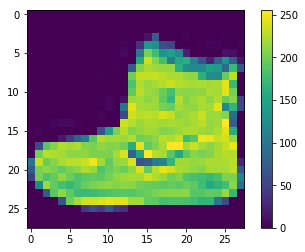

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 学習前処理

NeuralNetsは入力の学習前処理でデータをスケーリングする必要がある
正規化＝特徴量の取りうる値の範囲を一定の範囲に収める
$$
\begin{align}
x_{norm,i}=\frac{x_{i}−x_{min}}{x_{max}−x_{min}}
\end{align}
$$
理由:　　
特徴量ごとにスケールが異なると勾配降下法の更新幅がスケールが大きいほど大きくなってしまい，偏りが生じてしまう．　　
使用箇所:　　
・画像のピクセルのRGBを[0,255]　　
・sigmoid,tanhなどの活性化関数を用いるNNのモデル　　

sklearn:　　
sklearn.preprocessing.MinMaxScaler()　　

標準化＝特徴量の平均を0，分散を1にする変換　　
$$
\begin{align}
x_{std}=frac{x-m_{x}}{s_{x}}
m_{x}はxの標本平均，s_{x}はxの標本標準偏差
\end{align}
$$
使用箇所:　　
・ロジスティック回帰，SVM，NNなどの勾配法を用いるモデル　　　
・kNN,k-meansなどの距離を用いるモデル　　
・PCA，LDA，KernelPCAなどのFeature Extractionの手法　　

sklearn:　　
sklearn.preprocessing.StandardScaler()　　

Tree-based model(Decision Tree, Random Forest)では正規化，標準化は用いない

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
train_images = MinMaxScaler().fit_transform(train_images)
test_images = MinMaxScaler().fit_transform(test_images)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# MLP(Perceptron)

kerasで実装

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation

In [ ]:
batch_size = 128
num_classes = 10
epochs = 20
img_rows, img_cols = 28, 28

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=10)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels)

In [ ]:
nn_predections = model.predict(test_images)

# GBDT


LightGBMを用いる

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [ ]:
lgb_train = lgb.Dataset(train_images, train_labels)

In [ ]:
lgb_eval = lgb.Dataset(test_images, test_labels, reference=lgb_train)

In [ ]:
params = {'objective': 'multiclass'
         'num_class': 10,
         'num_boost_round': 300,
         'early_stopping_round': 5}
gbm = lgb.train(params, lgb_train, valid_sets=lgb_eval)

In [ ]:
lgb_predictions = gbm.predict(test_images, num_iteration=gbm.best_iteration)
lgb_predictions_max = np.argmax(lgb_predictions, test_labels)
print(accuracy_score(lgb_predictions_max, test_labels))

# Random Forest

# k-NN



# k-means

